#### Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Datasets/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()
# No Null Values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
No_cols = df.columns.size
No_cols

9

In [6]:
def Scaling(data):
    for j in range(No_cols-1):
        data[data.columns[j]] = data[data.columns[j]]/data[data.columns[j]].max()
    return(data)

In [7]:
Scale_df = Scaling(df)

In [8]:
df = Scale_df

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Check whether the Dataset is balanced or not

In [11]:
df["Outcome"].value_counts()
# Data is Imbalanced

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]

In [13]:
class_0_count,class_1_count = df.Outcome.value_counts()

In [14]:
print(class_0_count,class_1_count)

500 268


In [15]:
class_1_overS = class_1.sample(class_0_count,replace = True)
# We can add random values from that class to over sample that dataset...But replace = True os required for over sampling
class_1_overS.shape

(500, 9)

In [16]:
balanced_df = pd.concat([class_1_overS,class_0])
balanced_df.shape

(1000, 9)

In [17]:
df = balanced_df

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Outcome'])
y = df["Outcome"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.1, random_state = 15)

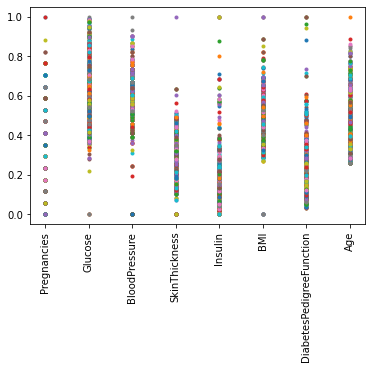

In [19]:
plt.plot(X_train.T, '.')
plt.xticks(rotation='vertical')
plt.show()

##### Here We can see that how each feature is distributed over the intervel with respect to Outcome

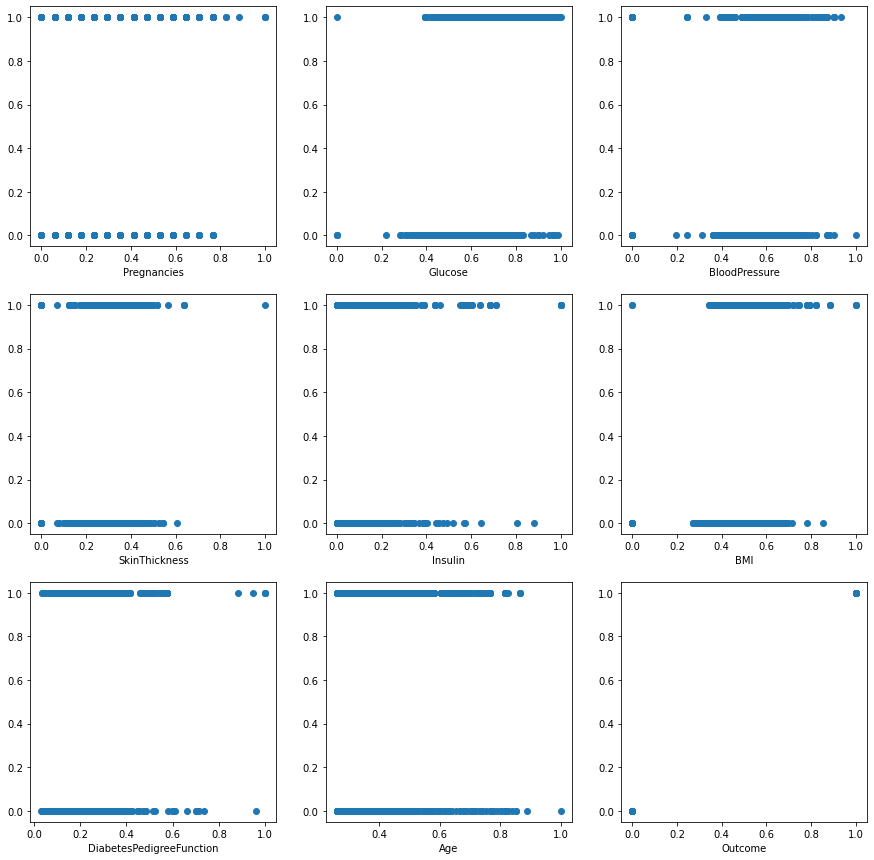

In [20]:
plt.figure(figsize=(15,15))
for j in range(No_cols):
    plt.subplot(3,3,j+1)
    x = df[df.columns[j]] 
    y = df['Outcome']
    plt.scatter(x, y)
    plt.xlabel(df.columns[j])

##### We convert Inputs in to Binary values as MP-Neuron works only on Binary values

In [21]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

##### pd.cut() Function used to convert continuous inputs to specific range here bins specifies the # of classes

In [22]:
X_test = x_binarised_test.values
X_train = x_binarised_train.values

In [23]:
for b in range(X_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(X_train, y_train):
        y_pred = (np.sum(x) <= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/X_train.shape[0])

0 453 0.5033333333333333
1 453 0.5033333333333333
2 453 0.5033333333333333
3 465 0.5166666666666667
4 511 0.5677777777777778
5 595 0.6611111111111111
6 572 0.6355555555555555
7 478 0.5311111111111111
8 447 0.49666666666666665


In [24]:
b = 5
y_pred_test = []
accurate_rows = 0

for x, y in zip(X_test, y_test):
    y_pred = (np.sum(x) <= b)
    y_pred_test.append(y_pred)
    accurate_rows += (y == y_pred)

print(b, accurate_rows, accurate_rows/X_test.shape[0])

5 73 0.73


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)

<AxesSubplot:>

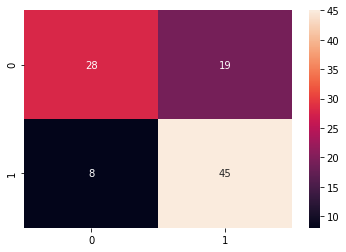

In [26]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.60      0.67        47
           1       0.70      0.85      0.77        53

    accuracy                           0.73       100
   macro avg       0.74      0.72      0.72       100
weighted avg       0.74      0.73      0.72       100



In [31]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) <= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])


In [32]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_train, y_train)

Optimal Value of  is 5
Highest accuracy is 0.6611111111111111


In [33]:
predicted = mp_neuron.predict(X_test)
accuracy_test = accuracy_score(predicted, y_test)
print(accuracy_test)

0.73
